In [2]:
%matplotlib inline

import underworld as uw
import math
from underworld import function as fn
import glucifer

In [3]:
linearMesh = uw.mesh.FeMesh_Cartesian('Q2/dPc1', (32,32), (0.,0.), (1.,1.))

In [4]:
constantMesh = linearMesh.subMesh

In [5]:
velocityField = uw.mesh.MeshVariable(linearMesh,2)
velocityField.data[:] = (0.,0.)

In [6]:
pressureField = uw.mesh.MeshVariable(constantMesh,1)
pressureField.data[:] = 0.

In [7]:
# setup freeslip
IWalls = linearMesh.specialSets["MinI_VertexSet"] + linearMesh.specialSets["MaxI_VertexSet"]
JWalls = linearMesh.specialSets["MinJ_VertexSet"] + linearMesh.specialSets["MaxJ_VertexSet"]
freeslip = uw.conditions.DirichletCondition(velocityField, (IWalls, JWalls))

In [8]:
linearMesh.specialSets.keys()

['MaxI_VertexSet',
 'MinI_VertexSet',
 'AllWalls_VertexSet',
 'MinJ_VertexSet',
 'MaxJ_VertexSet',
 'Empty']

In [66]:
# setup analytic functions
#solA = fn.analytic.SolCx()
# solA = fn.analytic.SolKx()
solA = fn.analytic.SolKx(1.0, 5.73, 2, 0.7)
#solA = fn.analytic.SolNL(eta0=1.0, n=2, r=1.5)


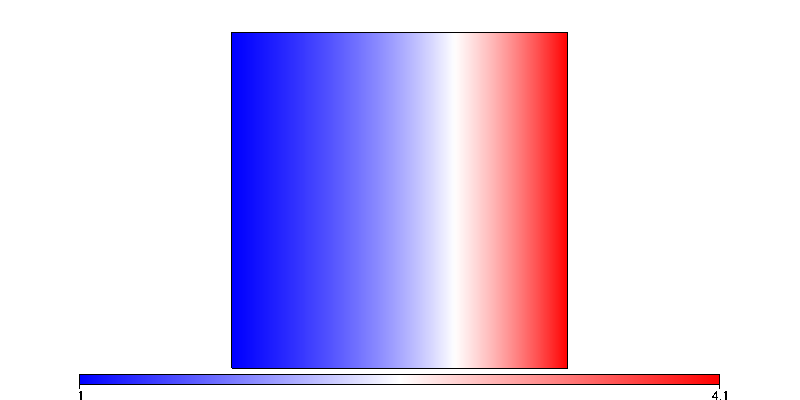

In [67]:
# plot figure
fig = glucifer.Figure( figsize=(800,400) )
fig.append( glucifer.objects.Surface(linearMesh, solA.fn_viscosity, colours="blue white red") )

fig.show()


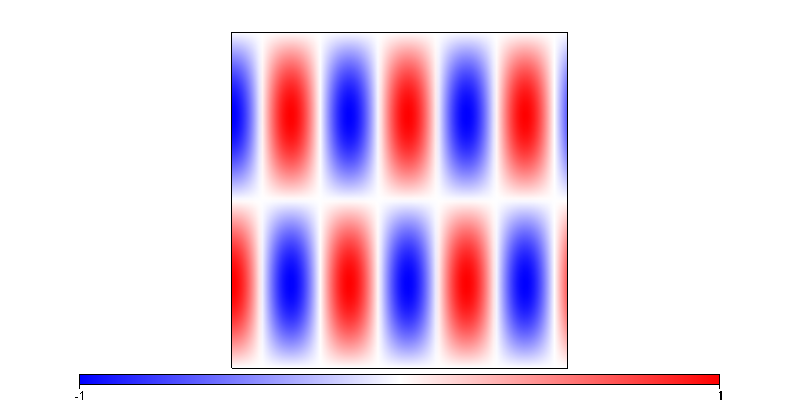

In [68]:
# plot figure
fig = glucifer.Figure( figsize=(800,400) )
fig.append( glucifer.objects.Surface(linearMesh, solA.fn_bodyforce[1], colours="blue white red") )

fig.show()

In [69]:
solA.fn_bodyforce[1].evaluate((1.0,0.75))


array([[-0.66131187]])

In [70]:
# setup our stokes guy
stokesSystem = uw.systems.Stokes(velocityField,pressureField,solA.fn_viscosity,solA.fn_bodyforce,conditions=[freeslip,])

In [75]:
# lets solve

solver = uw.systems.Solver( stokesSystem)
solver.solve()

In [76]:
errMesh=uw.mesh.FeMesh_Cartesian('Q1', (256,256), (0.,0.), (1.,1.))

In [77]:
# and analytic
#velMagA = plt.Figure()
#velMagA.Surface(fn.math.dot(solA.velocityFn,solA.velocityFn), linearMesh)
#velMagA.show()


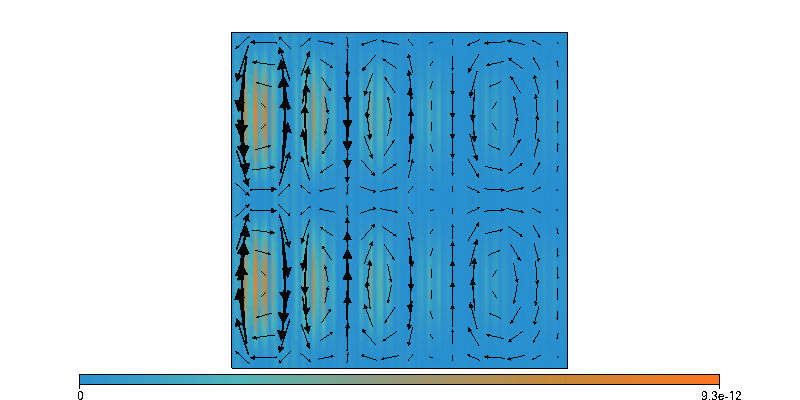

In [87]:
# plot figure
fig = glucifer.Figure( figsize=(800,400) )
fig.append( glucifer.objects.Surface(errMesh, fn.math.dot(solA.fn_velocity - velocityField,solA.fn_velocity - velocityField)))
fig.append( glucifer.objects.VectorArrows(errMesh, velocityField, arrowHead=0.2, scaling=100.2) )

fig.show()

In [ ]:
solA.

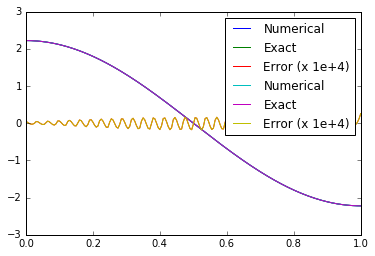

In [27]:
import numpy as np
N=201
a=np.ndarray(shape=(N,2))
a[:,1]=0.75*np.ones(N)
a[:,0]=np.linspace(0,1,N)
import matplotlib.pyplot as mplt
import matplotlib.pylab as pylab
vy=solA.fn_velocity[1].evaluate(a)[:,0]
ax=a[:,0]
vf=velocityField[1].evaluate(a)[:,0]
mplt.plot(ax,vf,label='Numerical')
mplt.plot(ax,vy,label='Exact')
mplt.plot(ax,10000*(vy-vf),label='Error (x 1e+4)')
mplt.legend()
mplt.plot(ax,vf,label='Numerical')
mplt.plot(ax,vy,label='Exact')
mplt.plot(ax,10000*(vy-vf),label='Error (x 1e+4)')
mplt.legend()

In [28]:
vf=velocityField[1].evaluate(a)[:,0]

In [29]:
vf.shape

(201,)

In [30]:
vy.shape

(201,)

In [31]:
ax.shape

(201,)

In [37]:
fn.analytic.SolNL?